In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.ndimage import find_objects
from matplotlib.colors import Normalize
from src.cpm_basic import CellularPottsModel

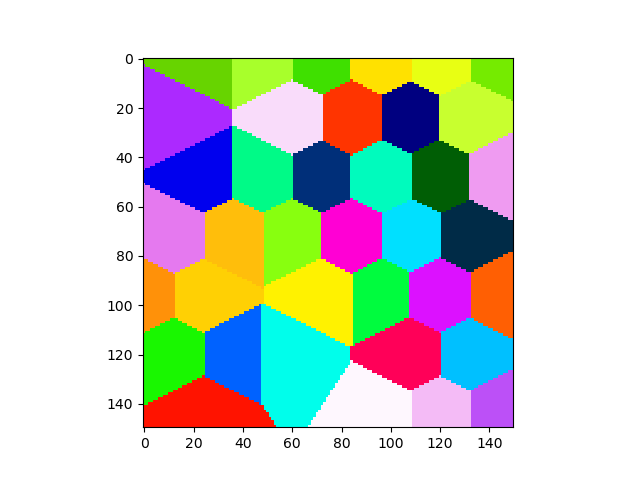

In [3]:
n_cells=38
n_types=2 
T=26 
L=150
C_p=6
adhessions= np.array([[0, 0.2, 0.2],  
                      [0.2, 10, 20],
                      [0.2, 20, 10]]) 
volume_coefficient= np.array([0, 50, 50])
lattice_type="hex"
object_volumes=None # Is default set in the CPM class if none
periodic=False


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, C_p=C_p, volume_coefficient=volume_coefficient,
                         adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
cpm.run_animation()